<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/05_Computer_vision_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Data

In [7]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downladed file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-22 02:15:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.50M  48.9MB/s    in 2.1s    

2021-10-22 02:15:47 (48.9 MB/s) - ‘pizza_steak.zip.4’ saved [109579078/109579078]



### Inspecting the Data

In [8]:
!ls pizza_steak

test  train


In [9]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [11]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [15]:
# Get the classnames programatically
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [16]:
# Visualize images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape : {img.shape}")

  return img

['3473991.jpg']
image shape : (512, 512, 3)


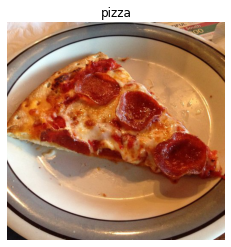

In [32]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

['2881783.jpg']
image shape : (512, 512, 3)


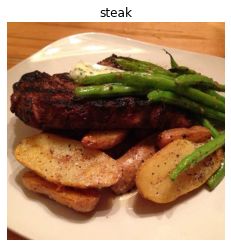

In [35]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")